# Key Metrics in Machine Learning

## 1. Classification Metrics
Classification tasks involve predicting categories (e.g., spam or not spam). Key metrics for classification include:

- **Accuracy**: The proportion of correctly predicted instances out of all instances.
  $$
  \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
  $$
  Accuracy is simple but can be misleading in imbalanced datasets.

- **Precision**: The proportion of true positive predictions (correctly predicted positive instances) among all instances predicted as positive.
  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$

- **Recall (Sensitivity)**: The proportion of true positive predictions among all actual positive instances.
  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$

- **F1-Score**: The harmonic mean of Precision and Recall. It is useful when there is a need to balance Precision and Recall.
  $$
  \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**: Measures how well the model distinguishes between classes. AUC is the area under the ROC curve, which plots the true positive rate (recall) against the false positive rate.

- **Confusion Matrix**: A table showing the counts of true positive, false positive, true negative, and false negative predictions.

---

## 2. Regression Metrics
Regression tasks involve predicting continuous values (e.g., predicting house prices). Key metrics for regression include:

- **Mean Absolute Error (MAE)**: The average of the absolute differences between the predicted and actual values.
  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$
  where $y_i$ is the actual value and $\hat{y}_i$ is the predicted value.

- **Mean Squared Error (MSE)**: The average of the squared differences between predicted and actual values. MSE penalizes larger errors more than MAE.
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Root Mean Squared Error (RMSE)**: The square root of the MSE. It gives a sense of the error in the same units as the target variable.
  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$

- **R-squared (R²)**: A statistical measure that represents the proportion of the variance for a dependent variable that's explained by the independent variables in the model.
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
  $$
  where $\bar{y}$ is the mean of the actual values. $R^2$ values closer to 1 indicate a better fit.

- **Adjusted R-squared**: A variation of R-squared that adjusts for the number of predictors in the model, helping to prevent overfitting.

---

## 3. Clustering Metrics
For unsupervised learning tasks like clustering, where the goal is to group similar instances together, the following metrics are common:

- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. A value close to 1 indicates well-clustered points.

- **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with the one most similar to it. Lower values indicate better clustering.

- **Adjusted Rand Index (ARI)**: Measures the similarity between two data clusterings while correcting for chance.

- **Homogeneity, Completeness, and V-Measure**: Measures for how well clusters correspond to true classes.

---

### Summary

- **Classification Metrics**: Accuracy, Precision, Recall, F1-Score, ROC-AUC, Confusion Matrix
- **Regression Metrics**: MAE, MSE, RMSE, R², Adjusted R²
- **Clustering Metrics**: Silhouette Score, Davies-Bouldin Index, ARI, V-Measure

Choosing the right metric depends on the specific problem, the type of model, and the dataset characteristics.


### roc auc

ROC-AUC Score: 0.8889


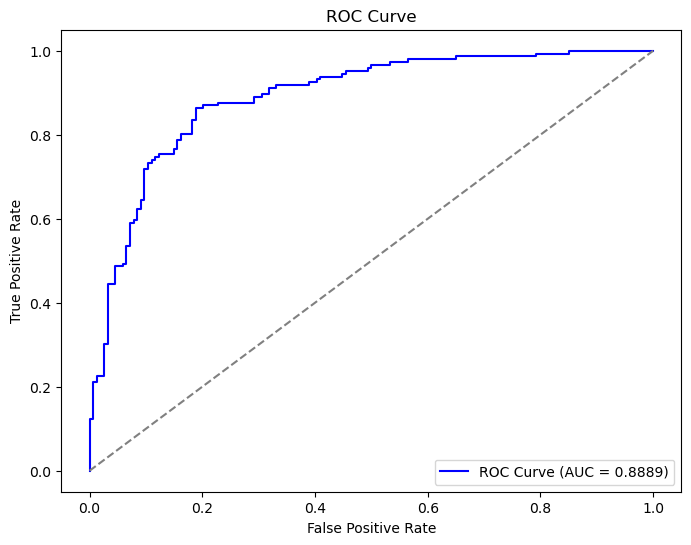

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_clusters_per_class=2, random_state=42)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# 4. Get predicted probabilities
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

# 5. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 6. Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


- A high AUC (close to 1) indicates that the model is good at distinguishing between positive and negative classes
- The ROC curve helps in understanding the model's behavior across different thresholds and its trade-offs between false positives and true positives.
- Model Performance: The ROC curve allows us to visualize the trade-off between sensitivity and specificity at different decision thresholds. If the curve is closer to the top-left corner (higher TPR and lower FPR), the model is performing well.
#### Threshold Selection:
- The ROC curve gives us a way to choose the optimal classification threshold based on the trade-off between TPR and FPR. A classifier's decision threshold can be adjusted to maximize sensitivity or specificity depending on the application. 


- If you want to minimize false positives, you may choose a threshold that moves the ROC curve closer to the top-left corner, thus lowering the FPR.
If you want to maximize true positives (e.g., detecting all possible cases of a disease), you might prioritize TPR even if it means increasing the FPR.